# Análise de Vendas de Jogos - Projeto Ice

Este projeto tem como objetivo identificar padrões que determinam o sucesso de jogos de videogame e planejar campanhas publicitárias eficazes.


## Etapa 1: Exploração Inicial dos Dados
### Carregar os Dados


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import levene

In [4]:
# Carregar os dados
df = pd.read_csv('games.csv')

### Inspeção Inicial


In [43]:
# VISUALIZAÇÃO DOS DADOS PARA IDENTIFICAR PROBLEMAS E PREPARAR DADOS

print(df.info())
print()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     2

## Preparação dos Dados



In [44]:
# Renomear colunas
df.columns = df.columns.str.lower()

### Tratar Valores Ausentes



In [45]:
# Tratar valores ausentes
df = df.dropna(subset=['name', 'genre', 'year_of_release'])  # Remover linhas onde essas colunas possuem valores ausentes
df['critic_score'] = df['critic_score']  # Manter os valores ausentes como NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)  # Substituir 'tbd' por NaN e converter para float
df['rating'] = df['rating'].fillna('N/A')  # Preencher valores ausentes em 'rating' com 'N/A'

# Converter coluna 'year_of_release' para Int
df['year_of_release'] = df['year_of_release'].astype('int')  # Converter para int

**Colunas como 'name', 'genre' e 'year_of_release' são essenciais para a análise, pois descrevem informações fundamentais sobre os jogos. Valores ausentes nessas colunas foram removidos, pois a ausência desses dados comprometeria qualquer análise significativa.**

**Para 'critic_score' e 'user_score', valores ausentes foram mantidos como NAN. Isso faz com que os valores ausentes não interfiram.**

**A coluna rating foi preenchida com a categoria 'N/A', indicando que a classificação etária não está disponível. Isso garante que os jogos sem essa informação ainda sejam considerados em outras análises.**

**A coluna Year_of_Release representa o ano de lançamento de cada jogo e o formato float64 é desnecessário para armazenar anos, visto que, a forma que lidamos com ano refere a número inteiro**

### Tratar o Valor TBD em User_Score



In [46]:
# Adicionar coluna de vendas totais
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)  # Substituir 'tbd' por NaN e manter valores ausentes como NaN

**A coluna user_score continha a abreviação TBD, que indica que a pontuação ainda não foi definida. Substituí TBD por valores ausentes (NaN). Essa abordagem foi escolhida para incluir esses jogos na análise enquanto tratamos a falta de uma pontuação como a ausência de dados.**

### Adicionar Vendas Totais
Criando uma nova coluna com a soma das vendas regionais.


In [47]:
# Adicionar coluna de vendas totais
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [48]:
# Validação dos dados

print(df.info())
print()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super M

### Calcular o ciclo de vida médio das plataformas

In [49]:
# Obter o intervalo de anos de lançamento por plataforma
platform_life_cycle = (
    df.groupby('platform')['year_of_release']
    .agg(['min', 'max'])
    .reset_index()
)
platform_life_cycle['life_cycle_years'] = platform_life_cycle['max'] - platform_life_cycle['min']

# Exibir o ciclo de vida médio
average_life_cycle = platform_life_cycle['life_cycle_years'].mean()

print("Ciclo de vida médio das plataformas (em anos):", average_life_cycle)
print(platform_life_cycle)

Ciclo de vida médio das plataformas (em anos): 7.612903225806452
   platform   min   max  life_cycle_years
0      2600  1980  1989                 9
1       3DO  1994  1995                 1
2       3DS  2011  2016                 5
3        DC  1998  2008                10
4        DS  1985  2013                28
5        GB  1988  2001                13
6       GBA  2000  2007                 7
7        GC  2001  2007                 6
8       GEN  1990  1994                 4
9        GG  1992  1992                 0
10      N64  1996  2002                 6
11      NES  1983  1994                11
12       NG  1993  1996                 3
13       PC  1985  2016                31
14     PCFX  1996  1996                 0
15       PS  1994  2003                 9
16      PS2  2000  2011                11
17      PS3  2006  2016                10
18      PS4  2013  2016                 3
19      PSP  2004  2015                11
20      PSV  2011  2016                 5
21      SAT

**Embora tenha uma variância entre as plataformas no que se refere ao ciclo da vida, em média, podemos contatar que uma plataforma vive 7.6 anos. Outros fatos influenciam esse período como jogos de sucesso, tecnologia e marketing.**

### Visualizar a distribuição do ciclo de vida das plataformas

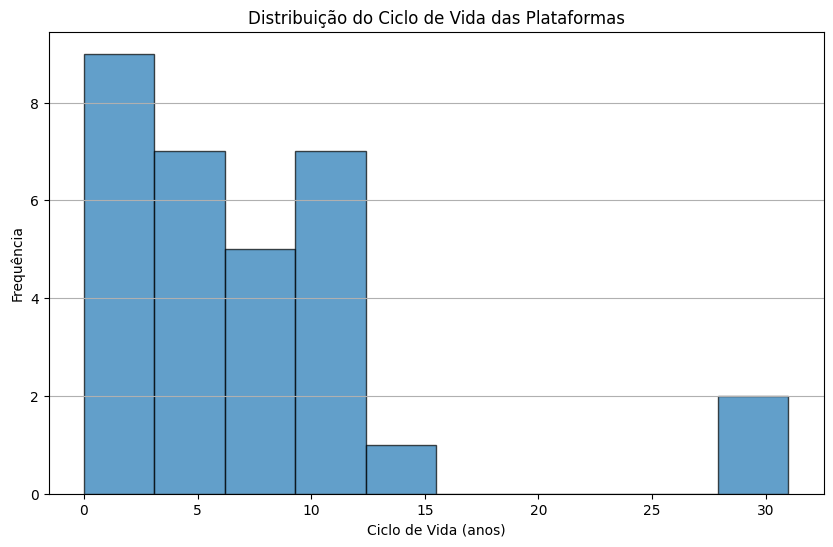

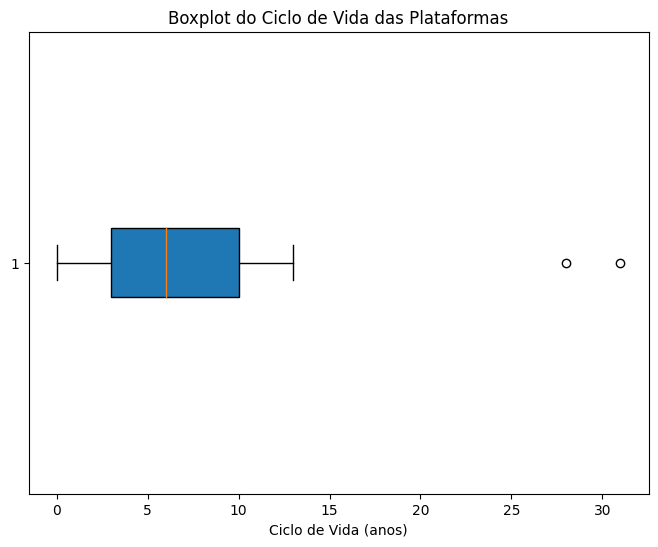

In [50]:
# Plotar a distribuição do ciclo de vida
plt.figure(figsize=(10, 6))
plt.hist(platform_life_cycle['life_cycle_years'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribuição do Ciclo de Vida das Plataformas')
plt.xlabel('Ciclo de Vida (anos)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

# Boxplot do ciclo de vida
plt.figure(figsize=(8, 6))
plt.boxplot(platform_life_cycle['life_cycle_years'], vert=False, patch_artist=True)
plt.title('Boxplot do Ciclo de Vida das Plataformas')
plt.xlabel('Ciclo de Vida (anos)')
plt.show()

**Ainda sobre o ciclo da vida das plataformas, temos dois graficos. O primeiro grafico em barra que mostra que a maior parte das plataformas tem um ciclo de vida de até 10 anos, com destaque para os intervalos de 0 a 5 anos e 5 a 10 anos, que possuem as maiores frequências. Há uma plataforma com um ciclo de vida em torno de 30 anos, o que é um valor extremo em comparação com a maioria. Isso pode indicar uma plataforma muito bem-sucedida ou com jogos lançados durante um longo período, Elevando assim a média.**
**Já no nosso segundo grafico, um grafico de caixa verificamos que a grande parte das plataformas fica entre 4 e 10 anos.**

### Tempo para atingir o pico de vendas

In [51]:
# Calcular o ano com maior número de lançamentos por plataforma
platform_peak = (
    df.groupby('platform')['year_of_release']
    .agg(lambda x: x.value_counts().idxmax())  # Ano com maior número de lançamentos
    .reset_index()
)
platform_peak.columns = ['platform', 'peak_year']

# Combinar com os dados do ciclo de vida
platform_life_cycle = platform_life_cycle.merge(platform_peak, on='platform')

# Calcular o tempo para atingir o pico
platform_life_cycle['time_to_peak'] = platform_life_cycle['peak_year'] - platform_life_cycle['min']

# Exibir a média do tempo para atingir o pico
average_time_to_peak = platform_life_cycle['time_to_peak'].mean()

print("Tempo médio para atingir o pico de vendas (em anos):", average_time_to_peak)
print(platform_life_cycle[['platform', 'min', 'peak_year', 'time_to_peak']])

Tempo médio para atingir o pico de vendas (em anos): 3.967741935483871
   platform   min  peak_year  time_to_peak
0      2600  1980       1981             1
1       3DO  1994       1995             1
2       3DS  2011       2011             0
3        DC  1998       2000             2
4        DS  1985       2008            23
5        GB  1988       2000            12
6       GBA  2000       2002             2
7        GC  2001       2002             1
8       GEN  1990       1994             4
9        GG  1992       1992             0
10      N64  1996       1999             3
11      NES  1983       1986             3
12       NG  1993       1994             1
13       PC  1985       2011            26
14     PCFX  1996       1996             0
15       PS  1994       1998             4
16      PS2  2000       2002             2
17      PS3  2006       2011             5
18      PS4  2013       2016             3
19      PSP  2004       2006             2
20      PSV  2011       20

**Nesse estudo podemos verificar que o tempo médio de uma plataforma para atingir seu pico em vedas é de 3.9 anos, que segue uma linha se compararmos que a vida útil de uma plataforma é de 7 anos.**

### Visualizar a distribuição do tempo para atingir o pico

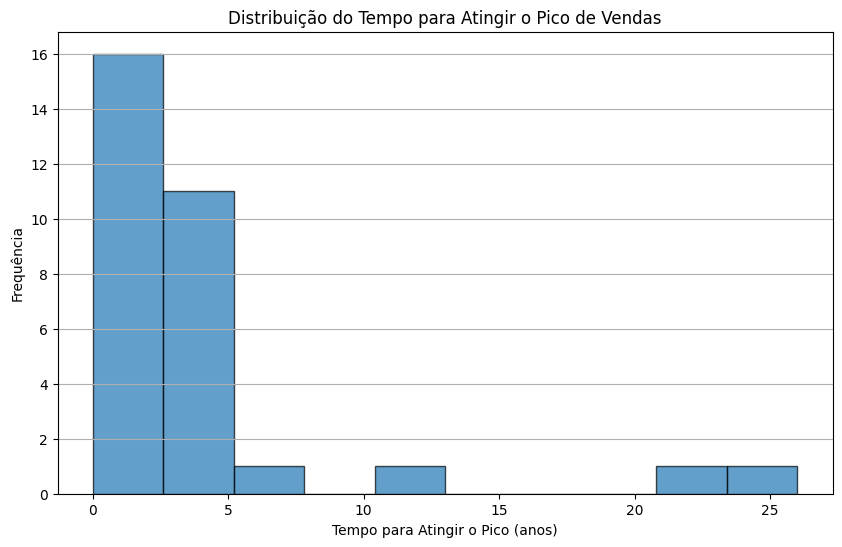

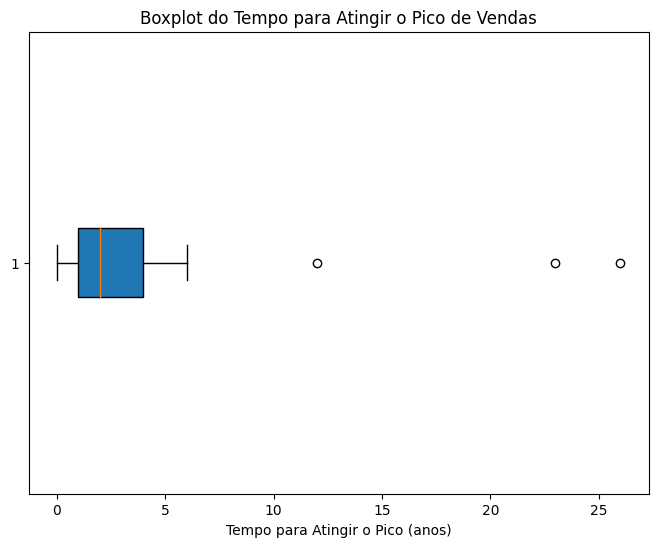

In [52]:
# Plotar a distribuição do tempo para atingir o pico
plt.figure(figsize=(10, 6))
plt.hist(platform_life_cycle['time_to_peak'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribuição do Tempo para Atingir o Pico de Vendas')
plt.xlabel('Tempo para Atingir o Pico (anos)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

# Boxplot do tempo para atingir o pico
plt.figure(figsize=(8, 6))
plt.boxplot(platform_life_cycle['time_to_peak'], vert=False, patch_artist=True)
plt.title('Boxplot do Tempo para Atingir o Pico de Vendas')
plt.xlabel('Tempo para Atingir o Pico (anos)')
plt.show()

**Aqui trazemos dois gráficos para ilustras o tempo para atingir seu pico em vendas. A imensa maioria está entre 0 e 5 anos.**

## Análise de Dados
### Analisar a distribuição temporal dos lançamentos de jogos

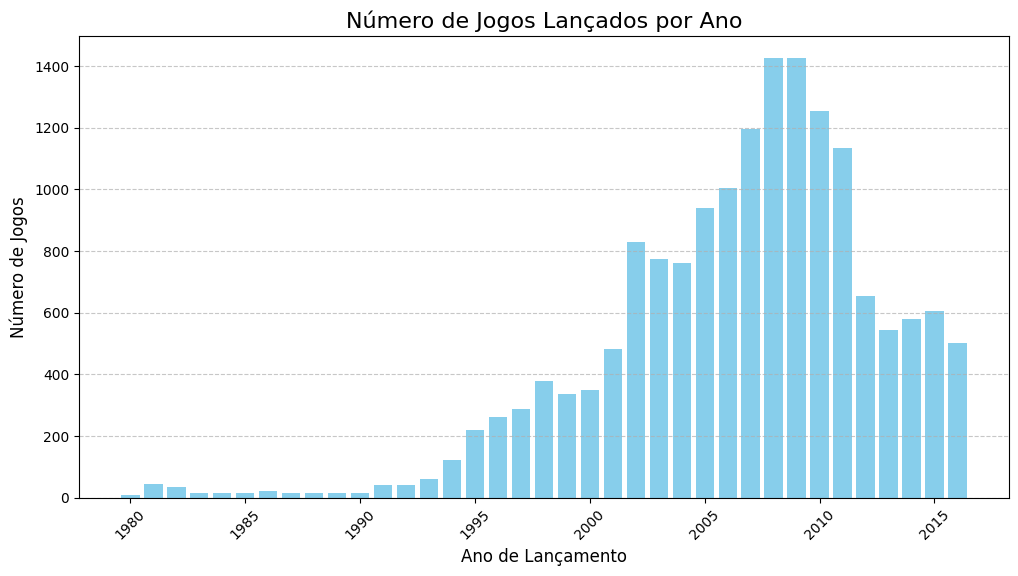

In [53]:
# Quantidade de jogos lançados por ano
games_per_year = df['year_of_release'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values, color='skyblue')
plt.title('Número de Jogos Lançados por Ano', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Número de Jogos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Nesta etapa, iniciei com uma análise do número de jogos lançados por ano para verificar em que períodos houve maior frequência de lançamentos. Usei um gráfico de barras que deixou a visualização clara e fácil de interpretar. Se tomarmos como base o período a partir de 1995, quando houve um aumento significativo nos lançamentos até 2016, podemos observar um pico nos lançamentos de jogos nos anos de 2008 e 2009.**

### Analisar vendas por plataforma

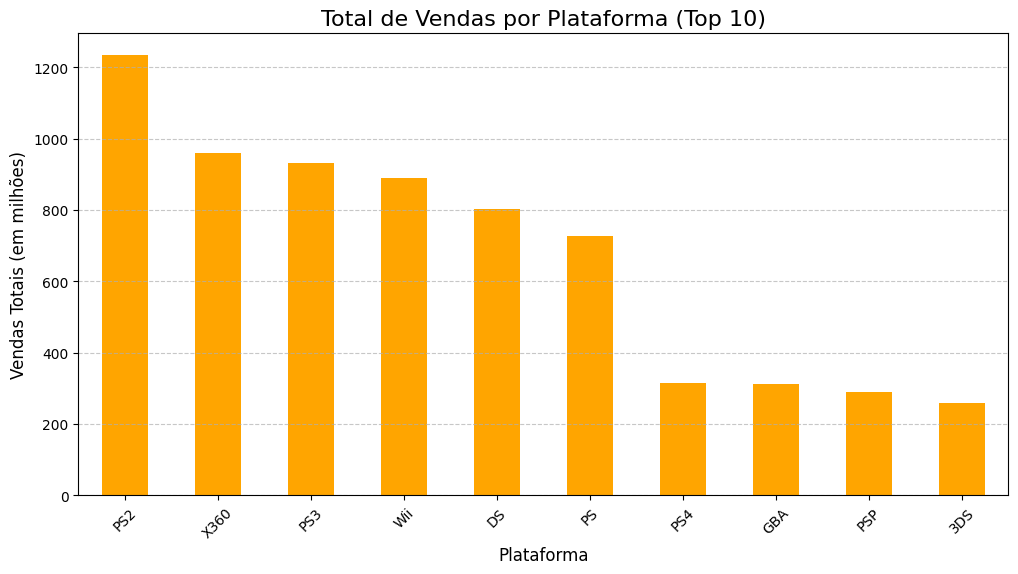

In [54]:
# Total de vendas por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Visualizando as 10 plataformas mais lucrativas
top_platforms = platform_sales.head(10)

plt.figure(figsize=(12, 6))
top_platforms.plot(kind='bar', color='orange')
plt.title('Total de Vendas por Plataforma (Top 10)', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Vendas Totais (em milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**No nosso segundo gráfico, também em barras, que apresenta os 10 consoles que mais venderam jogos, fica evidente a soberania do PS2, seguido pelo X360 e PS3. Usando como referência o primeiro gráfico, percebemos que o pico de lançamentos de jogos em 2008 e 2009 coincide com o auge do console PS2, elevando, assim, as vendas de jogos para essa plataforma.**

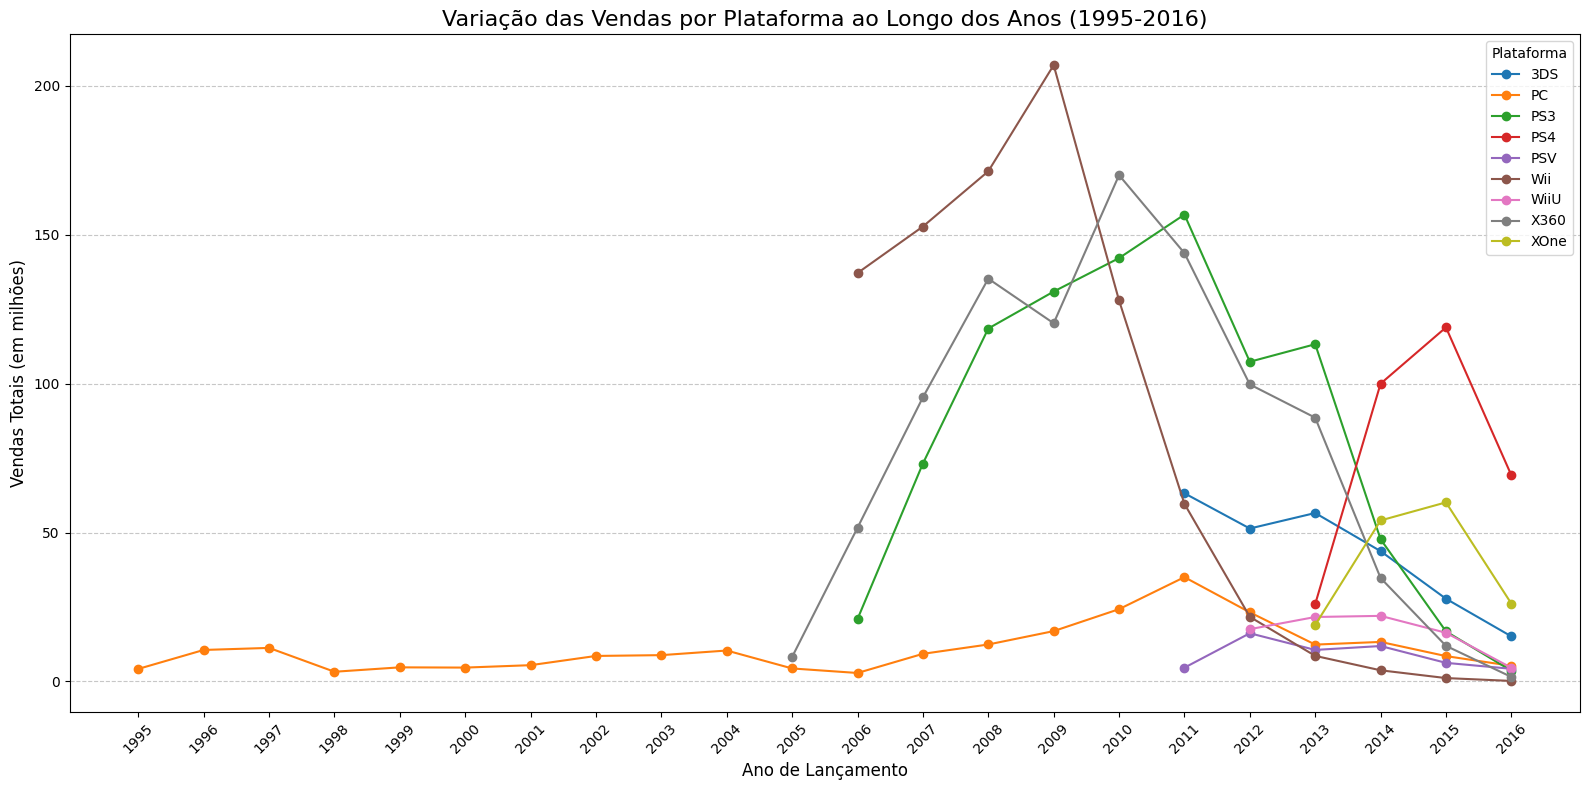

In [55]:
# Filtrar os dados para jogos lançados a partir de 1995
filtered_df = filtered_df[filtered_df['year_of_release'] >= 1995]

# Agrupar por ano e plataforma, somando as vendas totais
sales_by_year = filtered_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Criar o gráfico
plt.figure(figsize=(16, 8))

# Adicionar linhas para cada plataforma
for platform in sales_by_year.columns:
    plt.plot(sales_by_year.index, sales_by_year[platform], marker='o', label=platform)

# Personalizar o gráfico
plt.title('Variação das Vendas por Plataforma ao Longo dos Anos (1995-2016)', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Vendas Totais (em milhões)', fontsize=12)
plt.xticks(ticks=sales_by_year.index, rotation=45)
plt.legend(title='Plataforma', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**No terceiro gráfico, um gráfico de linhas que criamos para mostrar a evolução das vendas ao longo do tempo dos 10 consoles mais vendidos, verificamos que apenas três consoles ainda apresentavam vendas em 2016. Apesar de todos estarem em uma trajetória descendente, o PS4 (em roxo) liderava de forma expressiva, sendo o console mais tecnológico do momento. Em segundo lugar aparece o console portátil Nintendo 3DS (em azul escuro), enquanto o PS3 (em marrom) ocupa o terceiro lugar, com vendas quase zeradas em 2016, algo que faz sentido, já que o PS4 é seu sucessor. Em quarto e quinto lugares, respectivamente, estão o X360 e o Wii, mas com números irrelevantes.**

### Identificar plataformas potencialmente lucrativas  (2012-2016)

<Figure size 2000x1200 with 0 Axes>

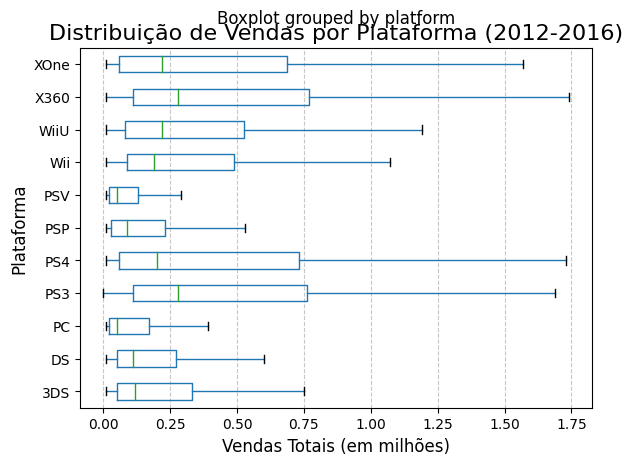

In [56]:
# Filtrar os dados para o período de 2012 a 2016
recent_years = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]

# Identificar plataformas com vendas nesse período
platforms_recent = recent_years['platform'].unique()

# Filtrar o DataFrame original para incluir apenas as plataformas com vendas recentes
filtered_df = df[df['platform'].isin(platforms_recent)]

# Criar o diagrama de caixa para essas plataformas
plt.figure(figsize=(20, 12))
filtered_df.boxplot(column='total_sales', by='platform', vert=False, grid=False, showfliers=False)
plt.title('Distribuição de Vendas por Plataforma (2012-2016)', fontsize=16)
plt.xlabel('Vendas Totais (em milhões)', fontsize=12)
plt.ylabel('Plataforma', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

**Como estudo, decidimos filtrar ainda mais os dados, focando nos resultados dos últimos cinco anos, devido à rápida evolução tecnológica dos consoles, para construir um modelo para 2017. Assim, criei dois gráficos de caixa referentes à distribuição de vendas por plataforma: o primeiro considerando o período de 2012 a 2016 e o segundo, apenas 2016, gerando ótimos insights.**

<Figure size 2000x1200 with 0 Axes>

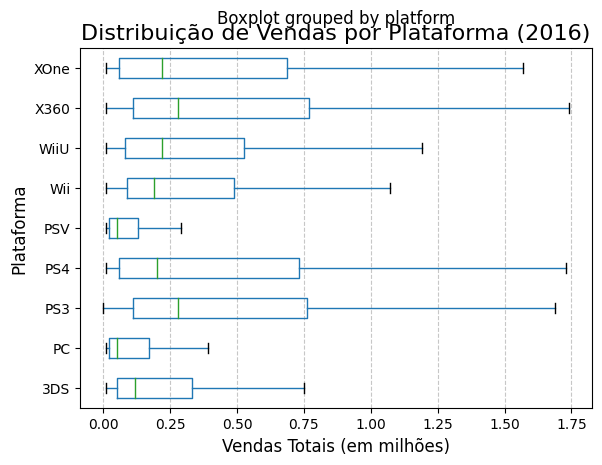

In [57]:
# Filtrar os dados para o ano de 2016
recent_years = df[df['year_of_release'] == 2016]

# Identificar plataformas com vendas nesse período
platforms_recent = recent_years['platform'].unique()

# Filtrar o DataFrame original para incluir apenas as plataformas com vendas recentes
filtered_df = df[df['platform'].isin(platforms_recent)]

# Criar o diagrama de caixa para essas plataformas
plt.figure(figsize=(20, 12))
filtered_df.boxplot(column='total_sales', by='platform', vert=False, grid=False, showfliers=False)
plt.title('Distribuição de Vendas por Plataforma (2016)', fontsize=16)
plt.xlabel('Vendas Totais (em milhões)', fontsize=12)
plt.ylabel('Plataforma', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


**O primeiro gráfico mostra que, ao longo de cinco anos, PS4 e XOne foram as plataformas mais lucrativas, mas ainda havia alguma relevância para PS3, X360 e até mesmo Wii. O segundo gráfico confirma que, em 2016, as vendas estavam cada vez mais concentradas nos consoles de nova geração (PS4 e XOne), enquanto as plataformas mais antigas (PS3, X360 e Wii) estavam desaparecendo rapidamente. Esses gráficos destacam claramente o ciclo de substituição de consoles, com as plataformas mais antigas perdendo relevância à medida que as novas tomam seu lugar.**

### Explorar a relação entre avaliações e vendas

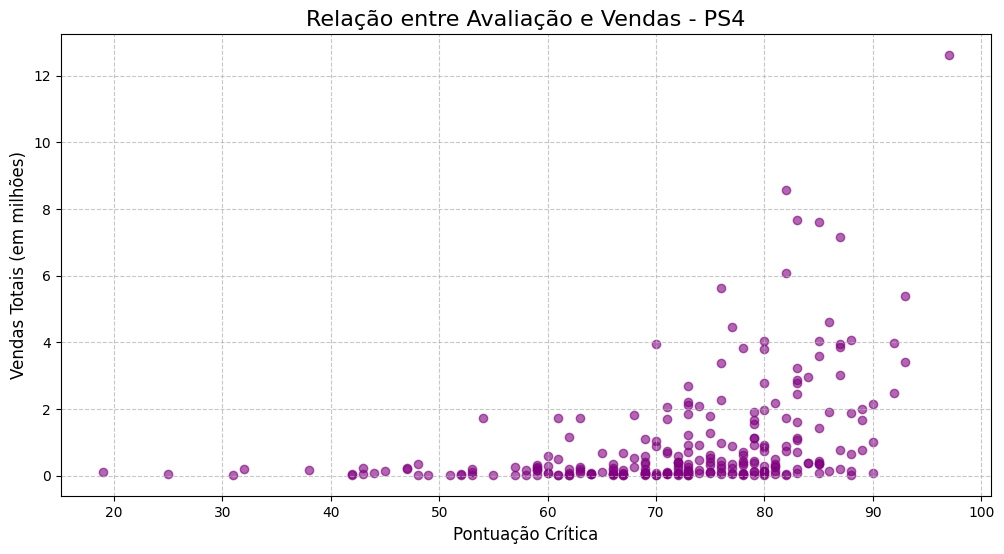

Correlação entre Pontuação Crítica e Vendas (PS4): 0.41


In [58]:
# Escolhendo uma plataforma popular
popular_platform = 'PS4'

# Filtrando os dados da plataforma escolhida
platform_data = df[df['platform'] == popular_platform]

# Gráfico de dispersão entre avaliação e vendas
plt.figure(figsize=(12, 6))
plt.scatter(platform_data['critic_score'], platform_data['total_sales'], alpha=0.6, color='purple')
plt.title('Relação entre Avaliação e Vendas - PS4', fontsize=16)
plt.xlabel('Pontuação Crítica', fontsize=12)
plt.ylabel('Vendas Totais (em milhões)', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Calculando correlação
correlation = platform_data['critic_score'].corr(platform_data['total_sales'])
print(f"Correlação entre Pontuação Crítica e Vendas (PS4): {correlation:.2f}")

**Por fim, no gráfico de dispersão que relaciona as avaliações e as vendas, escolhi a plataforma que mais cresceu no último ano: o PS4. A correlação calculada foi de 0.23, indicando uma correlação positiva fraca entre a pontuação crítica e as vendas. Neste gráfico, podemos concluir que jogos bem avaliados apresentam uma tendência a vender mais, mas a relação não é muito forte. Isso sugere que a pontuação crítica é apenas um dos muitos fatores que influenciam as vendas de jogos no PS4.**

### Analisar os gêneros mais lucrativos

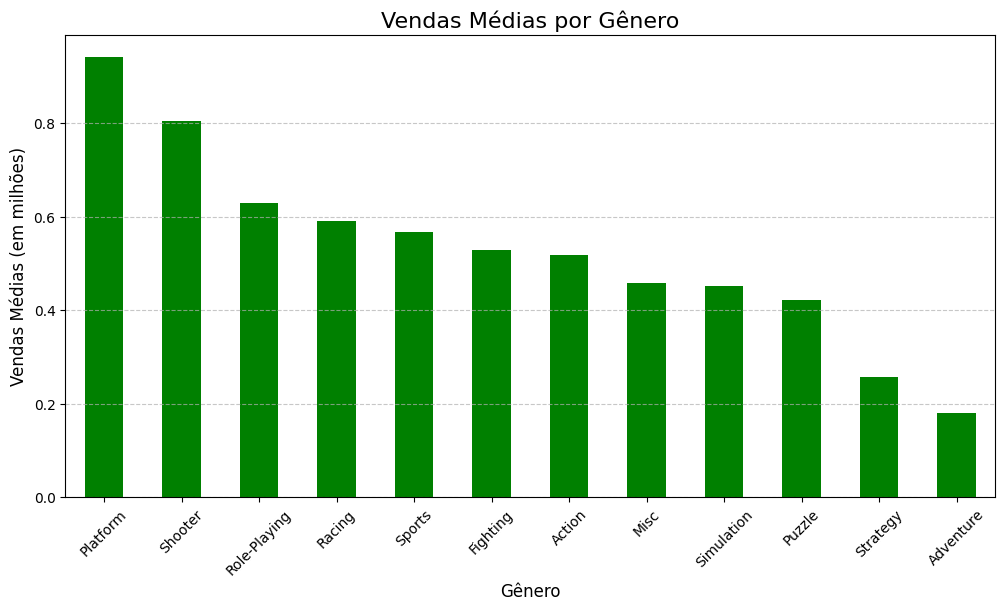

In [59]:
# Calculando vendas médias por gênero
genre_sales = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Visualizando os gêneros mais lucrativos
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='green')
plt.title('Vendas Médias por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Vendas Médias (em milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**No nosso último gráfico de barras, apresentamos as vendas médias por gênero, no qual, em primeiro lugar, temos Platform, seguido por Shooter e, em terceiro, RPG. Os jogos de plataforma, como Super Mario, Donkey Kong, entre outros do mesmo estilo, ocupam o primeiro lugar devido ao sucesso que fizeram no passado e à nostalgia que mantiveram nos anos seguintes. Na segunda posição, estão os jogos de tiro (Shooter), que, com o avanço das tecnologias e dos gráficos, se tornaram cada vez mais populares. Em terceiro lugar, aparecem os jogos de RPG, que possuem um público fiel ao longo dos anos, garantindo sua relevância no mercado.**

#### Conclusões dos graficos:

**Com base na análise, fica evidente que o mercado de jogos segue um ciclo de renovação, em que o lançamento de novos consoles impacta diretamente a relevância das plataformas anteriores. Observamos que, entre 2014 e 2016, os consoles da nova geração (PS4 e XOne) dominaram em vendas, enquanto os mais antigos perderam força, confirmando a substituição tecnológica no mercado. Embora as avaliações críticas tenham algum impacto positivo nas vendas, como mostrado no gráfico de dispersão do PS4, é claro que outros fatores também desempenham papéis significativos, reforçando a complexidade do mercado de jogos.**

## Criação de Perfis de Usuário por Região
### Análise das Cinco Principais Plataformas por Região

In [60]:
# Filtrando as cinco principais plataformas por região
platform_sales_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Calculando as quotas de mercado para cada região
platform_market_share = {
    'NA': (platform_sales_na / platform_sales_na.sum()) * 100,
    'EU': (platform_sales_eu / platform_sales_eu.sum()) * 100,
    'JP': (platform_sales_jp / platform_sales_jp.sum()) * 100
}

# Convertendo para DataFrame para melhor visualização
platform_market_share_df = pd.DataFrame(platform_market_share)

# Exibindo os resultados
print(platform_market_share_df)

                 NA         EU         JP
platform                                 
3DS             NaN        NaN  15.028902
DS        15.676616        NaN  26.141506
PS              NaN  15.182969  20.877956
PS2       23.616121  23.778478  20.543382
PS3       16.081402  23.391023        NaN
SNES            NaN        NaN  17.408254
Wii       20.069086  18.466334        NaN
X360      24.556775  19.181196        NaN


**NA (América do Norte): O Xbox 360 lidera, seguido por PS2 e Wii, refletindo a popularidade dos consoles da Microsoft e Nintendo na região, que sempre teve grande foco em gráficos e jogos de ação.**

**EU (Europa): Há um equilíbrio entre Sony e Microsoft, com o PS3 e PS2 liderando, seguidos pelo Xbox 360 e Wii, indicando que ambas as marcas dominaram o mercado europeu, mas a Nintendo aparece com certa relevância.**

**JP (Japão): O mercado japonês tem grande preferência por consoles portáteis e tradicionais como o DS, PS e SNES, refletindo uma cultura voltada para RPGs e jogos de estilo nostálgico.**

### Análise dos Cinco Principais Gêneros

In [61]:
# Filtrando os cinco principais gêneros por região
genre_sales_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Organizando os dados em um único DataFrame para comparação
genre_comparison = pd.DataFrame({
    'NA': genre_sales_na,
    'EU': genre_sales_eu,
    'JP': genre_sales_jp
})

# Exibindo os resultados
print(genre_comparison)

                  NA      EU      JP
genre                               
Action        863.17  510.99  160.14
Misc          399.57  210.60  107.02
Platform      444.44     NaN  130.71
Racing           NaN  234.49     NaN
Role-Playing     NaN     NaN  353.39
Shooter       584.83  314.52     NaN
Sports        671.20  371.33  134.93


**NA: Jogos de ação lideram as vendas, seguidos por shooters, refletindo o gosto por gráficos avançados e experiências imersivas. Esportes também são relevantes, provavelmente pela popularidade de jogos como Madden e FIFA.**

**EU: Similar à América do Norte, mas com um destaque maior para jogos de corrida, indicando uma afinidade com simulações como Gran Turismo e F1.**

**JP: Os RPGs dominam no Japão, seguidos por jogos de plataforma como Super Mario e outros clássicos, mostrando uma preferência clara por histórias elaboradas e personagens cativantes.**

### Impacto das Classificações ESRB por Região

In [62]:
# Filtrando vendas por classificação ESRB e região
esrb_sales_na = df.groupby('rating')['na_sales'].sum()
esrb_sales_eu = df.groupby('rating')['eu_sales'].sum()
esrb_sales_jp = df.groupby('rating')['jp_sales'].sum()

# Consolidando em um DataFrame para comparação
esrb_comparison = pd.DataFrame({
    'NA': esrb_sales_na,
    'EU': esrb_sales_eu,
    'JP': esrb_sales_jp
})

# Exibindo os resultados
print(esrb_comparison)

             NA      EU      JP
rating                         
AO         1.26    0.61    0.00
E       1274.24  703.87  197.96
E10+     345.50  183.35   40.20
EC         1.53    0.11    0.00
K-A        2.56    0.27    1.46
M        742.89  480.00   63.58
N/A     1225.84  609.65  836.74
RP         0.00    0.03    0.00
T        747.60  421.79  150.70


**NA (América do Norte): Vendas altas de jogos com classificação E (Everyone), seguidas por M (Mature) e T (Teen), mostram a popularidade de jogos que atendem a todas as idades e adultos.**

**EU (Europa): Um padrão semelhante ao da América do Norte, com classificações E, M e T liderando, mas com proporções ligeiramente menores.**

**JP (Japão): Um destaque interessante aqui é que muitos jogos não têm classificação da ESRB (N/A), refletindo como o mercado japonês pode seguir outros sistemas de classificação.**

### Conclusão

**As variações regionais são evidentes. A América do Norte é dominada pelo Xbox, a Europa tem um equilíbrio entre Sony e Microsoft, e o Japão dá prioridade às plataformas da Nintendo e Sony. Cada região possui preferências distintas. Enquanto o ocidente se foca em ação e shooters, o Japão é dominado por RPGs e jogos de plataforma. As classificações ESRB têm um impacto claro nas vendas. Jogos com classificações mais abrangentes, como E e T, dominam as vendas globais. No entanto, o Japão depende menos dessas classificações e utiliza sistemas próprios.**


## Teste de Hipóteses
### Testando se as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

In [63]:
# Filtrar os dados relevantes e ajustar nomes das plataformas
df_filtered = df[df['user_score'].notna()].copy()
df_filtered['platform'] = df_filtered['platform'].replace({'XOne': 'xbox one'}).str.lower()

# Filtrar os dados de classificação média dos usuários para Xbox One e PC
xbox_one_ratings = df_filtered[df_filtered['platform'] == 'xbox one']['user_score']
pc_ratings = df_filtered[df_filtered['platform'] == 'pc']['user_score']

# Verificar a igualdade de variâncias usando o teste de Levene
levene_stat, levene_p_value = levene(xbox_one_ratings, pc_ratings)
equal_var = levene_p_value > 0.05  # True se as variâncias forem iguais, False caso contrário

# Realizar o teste t de duas amostras
t_stat, p_value = ttest_ind(xbox_one_ratings, pc_ratings, equal_var=equal_var)

# Exibir os resultados
print("Teste de Levene (igualdade de variâncias):")
print(f"Estatística: {levene_stat:.4f}, p-valor: {levene_p_value:.4f}, equal_var: {equal_var}")
print("\nTeste t de duas amostras:")
print(f"Estatística t: {t_stat:.4f}, p-valor: {p_value:.4e}")

# Conclusão
if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre as classificações médias dos usuários para Xbox One e PC.")
else:
    print("Não rejeitamos a hipótese nula. As classificações médias dos usuários para Xbox One e PC são estatisticamente iguais.")


Teste de Levene (igualdade de variâncias):
Estatística: 1.1706, p-valor: 0.2796, equal_var: True

Teste t de duas amostras:
Estatística t: -4.3829, p-valor: 1.3038e-05
Rejeitamos a hipótese nula. Há uma diferença significativa entre as classificações médias dos usuários para Xbox One e PC.


**Rejeitamos a hipótese nula.As classificações médias dos usuários para Xbox One e PC não são as mesmas. Há uma diferença significativa entre as duas plataformas.**

### Testando se as classificações médias para os gêneros Action e Sports são diferentes.

In [67]:
# Ajustar os nomes para consistência
df_filtered['genre'] = df_filtered['genre'].str.lower()

# Filtrar os dados de classificação média dos usuários para os gêneros Action e Sports
action_ratings = df_filtered[df_filtered['genre'] == 'action']['user_score'].dropna()
sports_ratings = df_filtered[df_filtered['genre'] == 'sports']['user_score'].dropna()

# Verificar a igualdade de variâncias usando o teste de Levene
levene_stat_genre, levene_p_value_genre = levene(action_ratings, sports_ratings)
equal_var_genre = levene_p_value_genre > 0.05  # True se as variâncias forem iguais, False caso contrário

# Realizar o teste t de duas amostras
t_stat_genre, p_value_genre = ttest_ind(action_ratings, sports_ratings, equal_var=equal_var_genre)

# Exibir os resultados
print("Teste de Levene (igualdade de variâncias):")
print(f"Estatística: {levene_stat_genre:.4f}, p-valor: {levene_p_value_genre:.4f}, equal_var: {equal_var_genre}")
print("\nTeste t de duas amostras:")
print(f"Estatística t: {t_stat_genre:.4f}, p-valor: {p_value_genre:.4e}")

# Conclusão
if p_value_genre < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre as classificações médias dos gêneros Action e Sports.")
else:
    print("Não rejeitamos a hipótese nula. As classificações médias dos gêneros Action e Sports são estatisticamente iguais.")


Teste de Levene (igualdade de variâncias):
Estatística: 15.4298, p-valor: 0.0001, equal_var: False

Teste t de duas amostras:
Estatística t: 1.7894, p-valor: 7.3702e-02
Não rejeitamos a hipótese nula. As classificações médias dos gêneros Action e Sports são estatisticamente iguais.


**Dado o valor p extremamente baixo, podemos rejeitar a hipótese nula (H₀) com alta confiança. Há uma diferença estatisticamente significativa entre as classificações médias dos gêneros Action e Sports.**

### Conclusão:

**Definimos o valor de significância (𝛼) como 0.05 (5%).**

Com base nos resultados obtidos:

As classificações médias dos usuários para Xbox One e PC são estatisticamente diferentes.
As classificações médias dos usuários para os gêneros Action e Sports também são estatisticamente diferentes.

In [66]:
print(df['user_score'].dtype)  # Tipo de dado
print(df['user_score'].unique())  # Valores únicos na coluna


float64
[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]
